In [9]:
ls ../../../../../../..

bin@    eos/   lib@         media/      opt/   run/      spark/  tmp/
cvmfs/  etc/   lib64@       mnt/        proc/  sbin@     srv/    usr/
dev/    home/  lost+found/  notebooks/  root/  scratch/  sys/    var/


In [1]:
###IMPORTS###
import ROOT
# from IPython.display import clear_output
import pandas as pd

Welcome to JupyROOT 6.24/00


In [34]:
###FUNCTIONS###
def validate_uw_hists(tf,file,f_path,f_path_list, binNums,binNumsY, occupancies):  
    #main loop
    for key in tf.GetListOfKeys():    
        input = key.ReadObj()
        
        #determine if the location in the file we are at is a directory
        if issubclass(type(input),ROOT.TDirectoryFile):
           
            #record the path of the directory we are looking in
            try:
                f_path = input.GetPath() 
            except:
                print("cant GetPath")
                

            #split the path by '/' so we can determine where we are in the folder structure        
            try:
                split_path = f_path.split("/")
            except:
                print('cant split_path')            
            
            
            #recursively go deeper into the file structure depending on the length of split_path
#             print(split_path)
#             print(len(split_path)) # this number goes in the conditions below
            if len(split_path) <= 12:
                #we are 2 directories deep, go deeper
                f_path,f_path_list, binNums,binNumsY, occupancies = validate_uw_hists(input,file,f_path, f_path_list, binNums,binNumsY, occupancies)  
            elif len(split_path) > 12 and any(folder in split_path for folder in ('CaloMonitoring', 'Jets','MissingEt','Tau','egamma')):                
                #we are greater than 3 directories deep and these directories include the specified folders above, goo deeper
                f_path, f_path_list, binNums,binNumsY, occupancies = validate_uw_hists(input,file,f_path, f_path_list, binNums,binNumsY, occupancies)     
            else:
                pass
            
            #record the file_path that will result now that we are done with the current folder level
            #i.e. the folder path that results from going up a level in the directory
            f_path = f_path.split('/')
            f_path = '/'.join(f_path[:-1])
                
        elif issubclass(type(input), ROOT.TProfile):
            #record the path of the directory we are looking in with the name of the hist file as part of the path
            try:
                f_path_tp = f_path + '/' + input.GetName()                
            except:
                print("cant GetPath3")
            
            #get the part of f_path that follows the ':'
            f_path_tp = f_path_tp.split(':')
            f_path_tp = f_path_tp[1][1:]
            
            
            hist_file = file.Get(f_path_tp)
            binsX = hist_file.GetNbinsX()                                    
            
            #setup the 3 arrays for creating the dataframe
            for binX in range(binsX+1):
                f_path_list.append(f_path_tp)
                binNum = hist_file.GetBin(binX)
                binNums.append(binX)
                binNumsY.append(None)
                occupancies.append(hist_file.GetBinContent(binNum))                        
            
        elif issubclass(type(input),ROOT.TH2):

            #record the path of the directory we are looking in with the name of the hist file as part of the path
            try:
                f_path_th2 = f_path + '/' + input.GetName()                
            except:
                print("cant GetPath3")
            
            #get the part of f_path that follows the ':'
            f_path_th2 = f_path_th2.split(':')
            f_path_th2 = f_path_th2[1][1:]
            
            
            hist_file = file.Get(f_path_th2)
            binsX = hist_file.GetNbinsX()                        
            binsY = hist_file.GetNbinsY()
            
            #setup the 3 arrays for creating the dataframe
            for binX in range(binsX+1):
                for binY in range(binsY+1):
                    f_path_list.append(f_path_th2)
                    binNumXY = hist_file.GetBin(binX,binY)
                    binNums.append(binX)
                    binNumsY.append(binY)
                    occupancies.append(hist_file.GetBinContent(binNumXY))            
                
        elif issubclass(type(input),ROOT.TH1):
            
            #record the path of the directory we are looking in with the name of the hist file as part of the path
            try:
                f_path_th1 = f_path + '/' + input.GetName()                
            except:
                print("cant GetPath2")

            #get the part of f_path that follows the ':'
            f_path_th1 = f_path_th1.split(':')
            f_path_th1 = f_path_th1[1][1:]
            
            
            hist_file = file.Get(f_path_th1)
            binsX = hist_file.GetNbinsX()            
            
         #setup the 3 arrays for creating the dataframe
            for binX in range(binsX+1):                
                f_path_list.append(f_path_th1)
                binNum = hist_file.GetBin(binX,0)                
                binNums.append(binNum)
                binNumsY.append(None)                
                occupancies.append(hist_file.GetBinContent(binNum))
    
    return f_path, f_path_list, binNums,binNumsY, occupancies

In [ ]:
#putting a stop time between print iterations reduced the time immensely
#removing all the prints reduced the calculation time by over 300% from that point
#last full run of TH1/TH2 took 43s

#MAY want to put in a f_type array and append to it for each one so that we know what file type we are looking at

In [13]:
ls ../../../../../eos/atlas/atlascerngroupdisk/data-dqm/references/data18_13TeV.00358031.physics_Main.merge.HIST.f961_h322._0001.1

AFPOutput62-337176-500k.root
Collisions/
data12_cos.00214303.express_express.merge.HIST.f487_m1252._0001.1
data13_hip.00218048.express_express.merge.HIST.f514_m1291._0001.1
data13_hip.00218048.express_express.merge.HIST.f761_h183._0001.1
data13_hip.00218048.physics_HardProbes.merge.HIST.f514_m1291._0001.1
data13_hip.00218048.physics_HardProbes.merge.HIST.f761_h183._0001.1
data15_13TeV.00271298.express_express.merge.HIST.f611_h57._0001.1
data15_13TeV.00271298.express_express.merge.HIST.f616_h66._0001.1
data15_13TeV.00271298.express_express.merge.HIST.f619_h67._0001.1
data15_13TeV.00271298.express_express.merge.HIST.x345_h56._0001.1
data15_13TeV.00271298.physics_Main.merge.HIST.f611_h57._0001.1
data15_13TeV.00271298.physics_Main.merge.HIST.f616_h66._0001.1
data15_13TeV.00271298.physics_Main.merge.HIST.f619_h67._0001.1
data15_13TeV.00276689.express_express.merge.HIST.f623_h71._0001.1
data15_13TeV.00276689.express_express.merge.HIST.f626_h75._0001.1
data15_13TeV.00276689.physics_Main.merge

In [30]:
path = '../../../../../eos/atlas/atlascerngroupdisk/data-dqm/references/data18_13TeV.00358031.physics_Main.merge.HIST.f961_h322._0001.1'

In [35]:
file = ROOT.TFile.Open(path)
f_path,f_path_list, binNums,binNumsY, occupancies = validate_uw_hists(file,file,'',[],[],[],[])
df = pd.DataFrame({'paths':f_path_list,'x':binNums,'y':binNumsY,'occ':occupancies})
df

,paths,x,y,occ
0,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,0,NaN,0.000000
1,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,1,NaN,88.713422
2,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,2,NaN,176.447114
3,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,3,NaN,176.904572
4,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,4,NaN,151.669917
...,...,...,...,...
4004612,run_358031/egamma/tagandprobeZ/electronTagAndP...,60,NaN,8458.000000
4004613,run_358031/egamma/tagandprobeZ/electronTagAndP...,61,NaN,8347.000000
4004614,run_358031/egamma/tagandprobeZ/electronTagAndP...,62,NaN,8365.000000
4004615,run_358031/egamma/tagandprobeZ/electronTagAndP...,63,NaN,8329.000000


In [36]:
# file = ROOT.TFile.Open('../data15_13TeV.00276689.physics_Main.merge.HIST.f1051_h335._0001.1')
# f_path,f_path_list, binNums,binNumsY, occupancies = validate_uw_hists(file,file,'',[],[],[],[])
# df = pd.DataFrame({'paths':f_path_list,'x':binNums,'y':binNumsY,'occ':occupancies})
# df

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/ROOT/_facade.py:150: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  return _orig_ihook(name, *args, **kwds)


In [37]:
df[df['paths'] == df['paths'].unique()[0]].head()

,paths,x,y,occ
0,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,0,NaN,0.000000
1,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,1,NaN,88.713422
2,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,2,NaN,176.447114
3,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,3,NaN,176.904572
4,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,4,NaN,151.669917


In [38]:
df[df['paths'] == df['paths'].unique()[0]].shape

(99, 4)

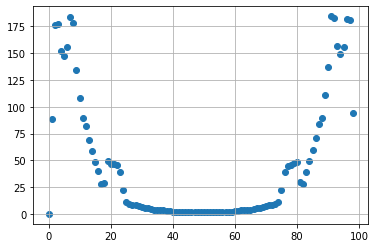

In [41]:
plt.scatter(df[df['paths'] == df['paths'].unique()[0]]['x'].values,df[df['paths'] == df['paths'].unique()[0]]['occ'].values)
plt.grid()

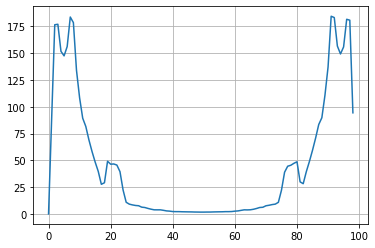

In [42]:
plt.plot(df[df['paths'] == df['paths'].unique()[0]]['x'].values,df[df['paths'] == df['paths'].unique()[0]]['occ'].values)
plt.grid()

# QUESTIONS:
- does every hist file of the same stream, ftag, etc have the same number of X/Y bins per specific histogram as every other hist file?

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004617 entries, 0 to 4004616
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   paths   object 
 1   x       int64  
 2   y       float64
 3   occ     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 122.2+ MB


In [ ]:
#wait...so we would have to...in order to train for individual histograms...go through the entire folder of hundreds
#if not thousands of files and store these in an array/dataframe to train a ML algorithm.
#theres 3000+ files meaning we would have to train 3000+ ML algorithms?

#the big question here: is there a difference in the distribution of certain groups of files?
#this way we dont have to do hat many ML algorithms and can train with mroe data

In [49]:
# df['x'] = df['x'].astype('int8')
df['y'] = df['y'].astype('float16')
df['occ'] = df['occ'].astype('float16')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004617 entries, 0 to 4004616
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   paths   object 
 1   x       int8   
 2   y       float16
 3   occ     float16
dtypes: float16(2), int8(1), object(1)
memory usage: 49.6+ MB


In [56]:
tmp = df[df['paths'] == df['paths'].unique()[0]]
tmp = tmp.iloc[:,[0,1,3]]
tmp.head()

,paths,x,occ
0,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,0,0.0000
1,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,1,88.6875
2,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,2,176.5000
3,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,3,176.8750
4,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,4,151.6250


In [59]:
tmp['x'].max()

98

In [60]:
tmp['x'].min()

0

In [65]:
# Total number of datapoints =...
tmp['x'].max()+1

99

In [66]:
(tmp['x'].max()+1) /2

49.5

In [69]:
(np.arange(0,99)-49.5)/10

array([-4.95, -4.85, -4.75, -4.65, -4.55, -4.45, -4.35, -4.25, -4.15,
       -4.05, -3.95, -3.85, -3.75, -3.65, -3.55, -3.45, -3.35, -3.25,
       -3.15, -3.05, -2.95, -2.85, -2.75, -2.65, -2.55, -2.45, -2.35,
       -2.25, -2.15, -2.05, -1.95, -1.85, -1.75, -1.65, -1.55, -1.45,
       -1.35, -1.25, -1.15, -1.05, -0.95, -0.85, -0.75, -0.65, -0.55,
       -0.45, -0.35, -0.25, -0.15, -0.05,  0.05,  0.15,  0.25,  0.35,
        0.45,  0.55,  0.65,  0.75,  0.85,  0.95,  1.05,  1.15,  1.25,
        1.35,  1.45,  1.55,  1.65,  1.75,  1.85,  1.95,  2.05,  2.15,
        2.25,  2.35,  2.45,  2.55,  2.65,  2.75,  2.85,  2.95,  3.05,
        3.15,  3.25,  3.35,  3.45,  3.55,  3.65,  3.75,  3.85,  3.95,
        4.05,  4.15,  4.25,  4.35,  4.45,  4.55,  4.65,  4.75,  4.85])

Text(0.5, 1.0, 'run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_AvEnergy/eta_avgenergy')

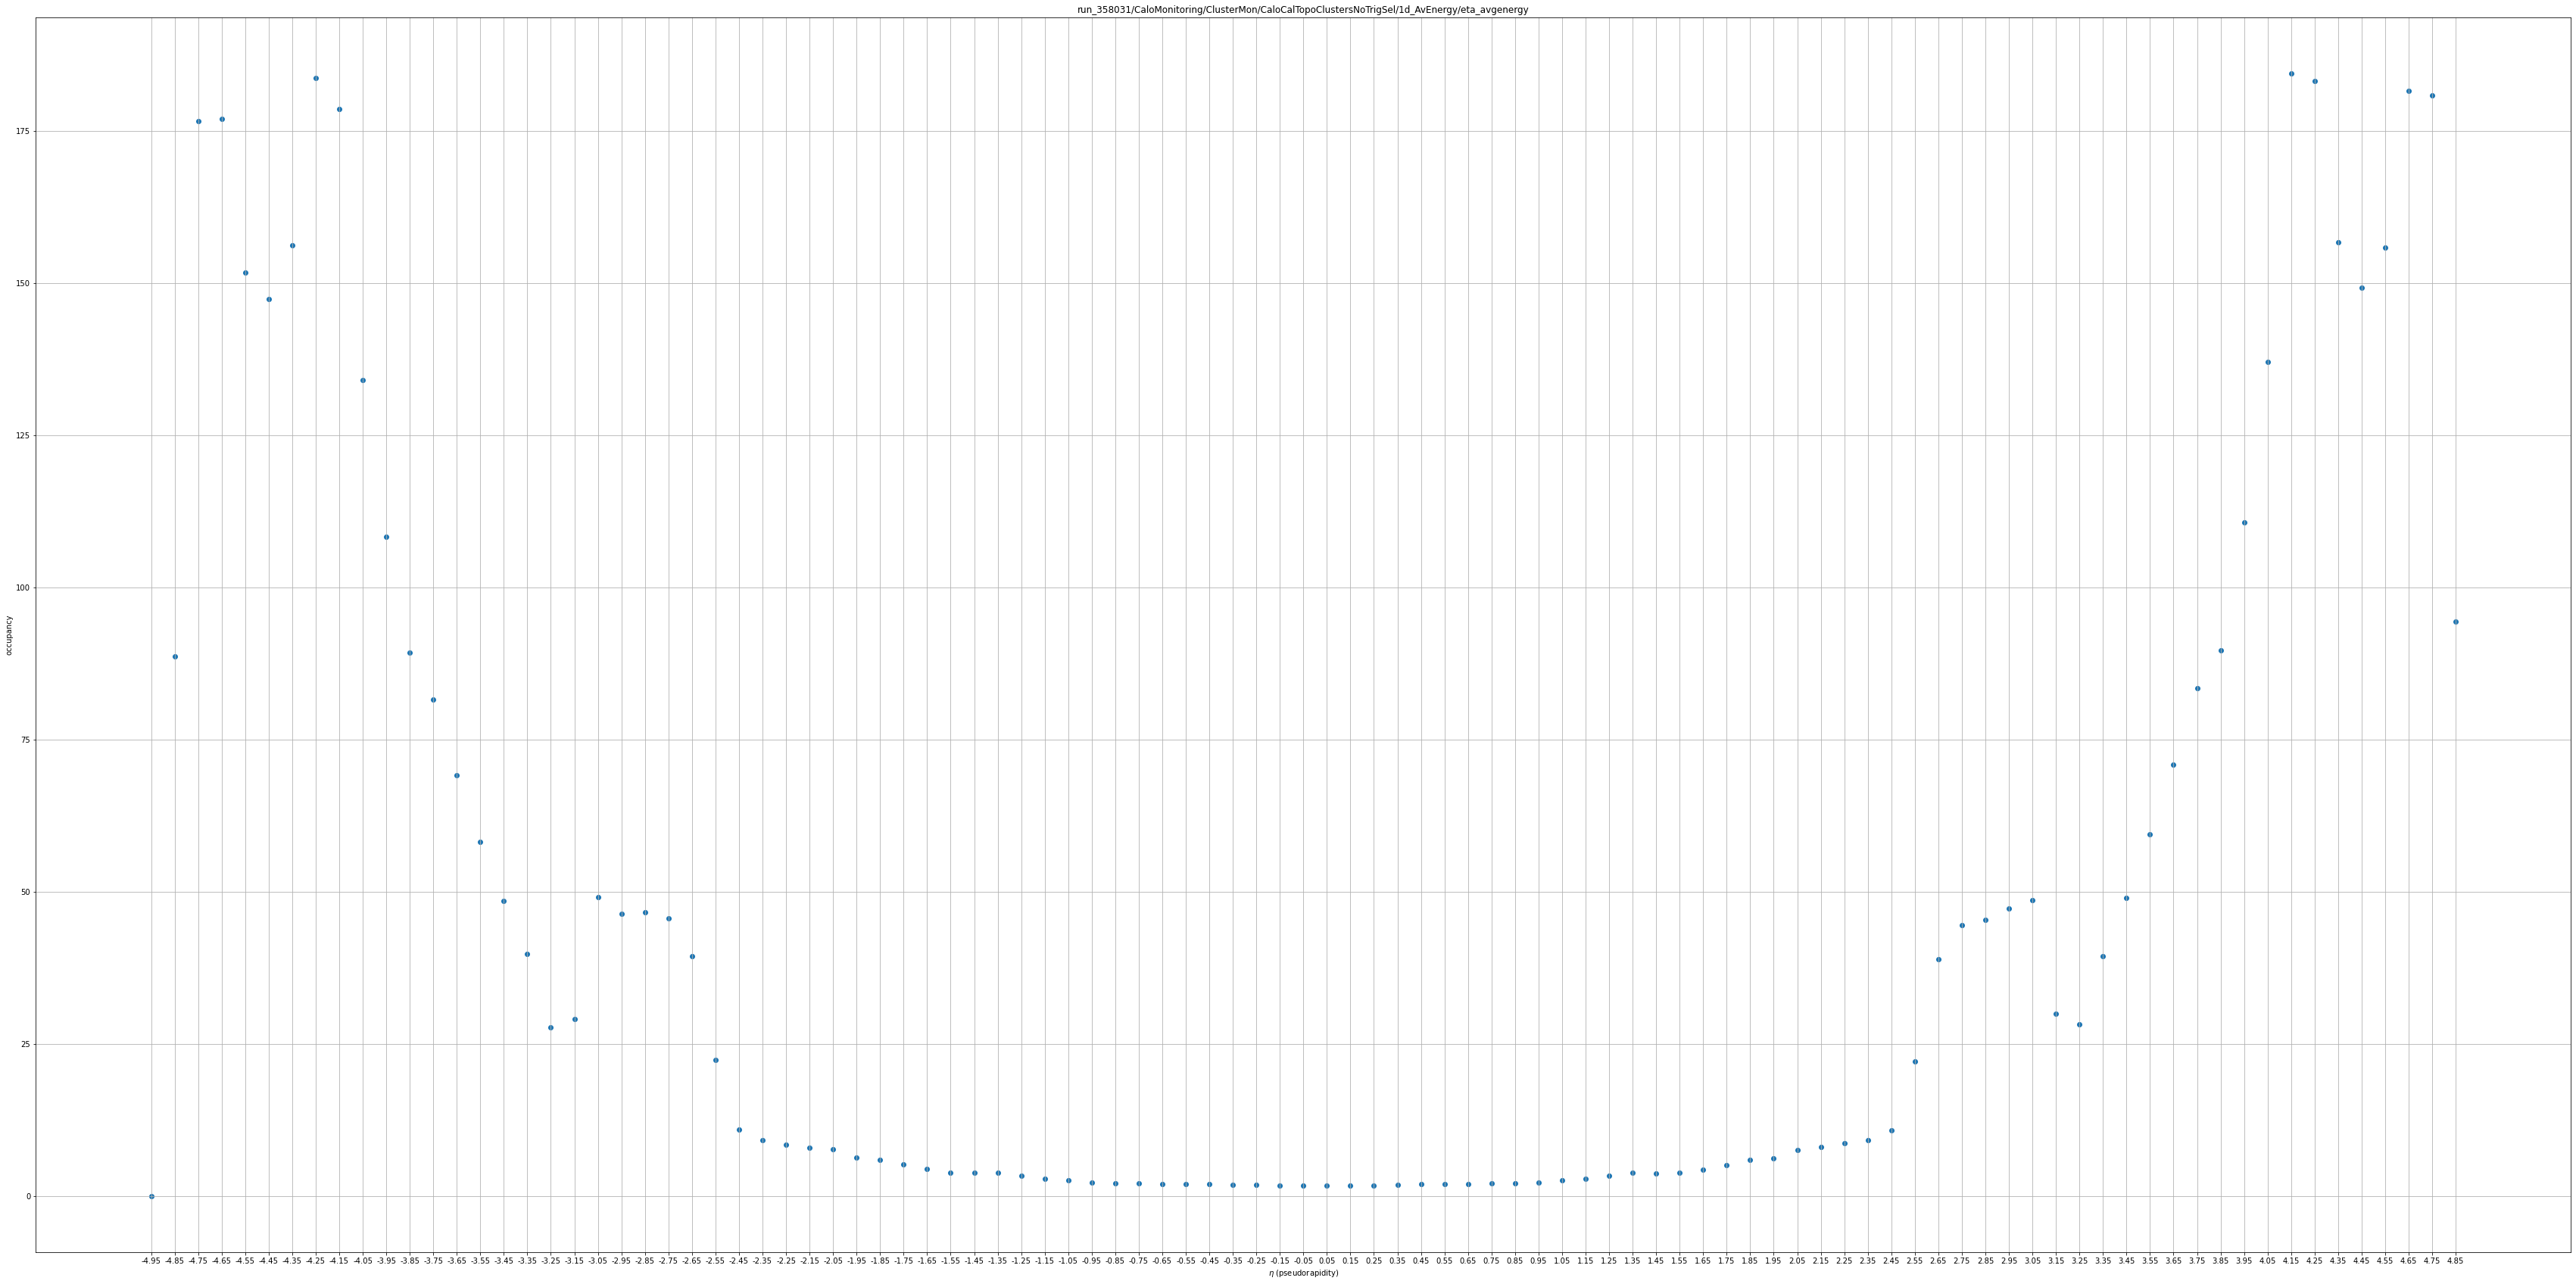

In [83]:
# Plotted this time with the properly scaled pseudorapidity
plt.figure(figsize=(60,30))
plt.scatter(tmp['x'],tmp['occ'])
plt.grid()
plt.xticks(tmp['x'].values,(np.arange(0,99)-49.5)/10)
plt.xlabel(r'$\eta$ (pseudorapidity)')
plt.ylabel('occupancy')
plt.title(df['paths'].unique()[0])

In [98]:
for idV,val in enumerate(df['paths'].unique()):
    print(idV,val)

0 run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_AvEnergy/eta_avgenergy
1 run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_AvEnergy/phi_avgenergy
2 run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_Rates/m_clus_eta_Et0
3 run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_Rates/m_clus_eta_Et1
4 run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_Rates/m_clus_eta_Et2
5 run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_Rates/m_clus_eta_Et3
6 run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_Rates/m_clus_phi_Et0Barrel
7 run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_Rates/m_clus_phi_Et0EndcapA
8 run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_Rates/m_clus_phi_Et0EndcapC
9 run_358031/CaloMonitoring/ClusterMon/CaloCalTopoClustersNoTrigSel/1d_Rates/m_clus_phi_Et1Barrel
10 run_358031/CaloMonitoring/ClusterMon/CaloCalTop

In [128]:
tmp = df[df['paths'] == df['paths'].unique()[21]]
# tmp = tmp.iloc[:,[0,1,3]]
tmp.head()

,paths,x,y,occ
20509,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,0,0.0,0.0
20510,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,0,1.0,0.0
20511,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,0,2.0,0.0
20512,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,0,3.0,0.0
20513,run_358031/CaloMonitoring/ClusterMon/CaloCalTo...,0,4.0,0.0


([<matplotlib.axis.XTick at 0x7f46135cb9d0>,
 [Text(0, 0, '-4.95'),
  Text(1, 0, '-4.85'),
  Text(2, 0, '-4.75'),
  Text(3, 0, '-4.65'),
  Text(4, 0, '-4.55'),
  Text(5, 0, '-4.45'),
  Text(6, 0, '-4.35'),
  Text(7, 0, '-4.25'),
  Text(8, 0, '-4.15'),
  Text(9, 0, '-4.05'),
  Text(10, 0, '-3.95'),
  Text(11, 0, '-3.85'),
  Text(12, 0, '-3.75'),
  Text(13, 0, '-3.65'),
  Text(14, 0, '-3.55'),
  Text(15, 0, '-3.45'),
  Text(16, 0, '-3.35'),
  Text(17, 0, '-3.25'),
  Text(18, 0, '-3.15'),
  Text(19, 0, '-3.05'),
  Text(20, 0, '-2.95'),
  Text(21, 0, '-2.85'),
  Text(22, 0, '-2.75'),
  Text(23, 0, '-2.65'),
  Text(24, 0, '-2.55'),
  Text(25, 0, '-2.45'),
  Text(26, 0, '-2.35'),
  Text(27, 0, '-2.25'),
  Text(28, 0, '-2.15'),
  Text(29, 0, '-2.05'),
  Text(30, 0, '-1.95'),
  Text(31, 0, '-1.85'),
  Text(32, 0, '-1.75'),
  Text(33, 0, '-1.65'),
  Text(34, 0, '-1.55'),
  Text(35, 0, '-1.45'),
  Text(36, 0, '-1.35'),
  Text(37, 0, '-1.25'),
  Text(38, 0, '-1.15'),
  Text(39, 0, '-1.05'),
  Tex

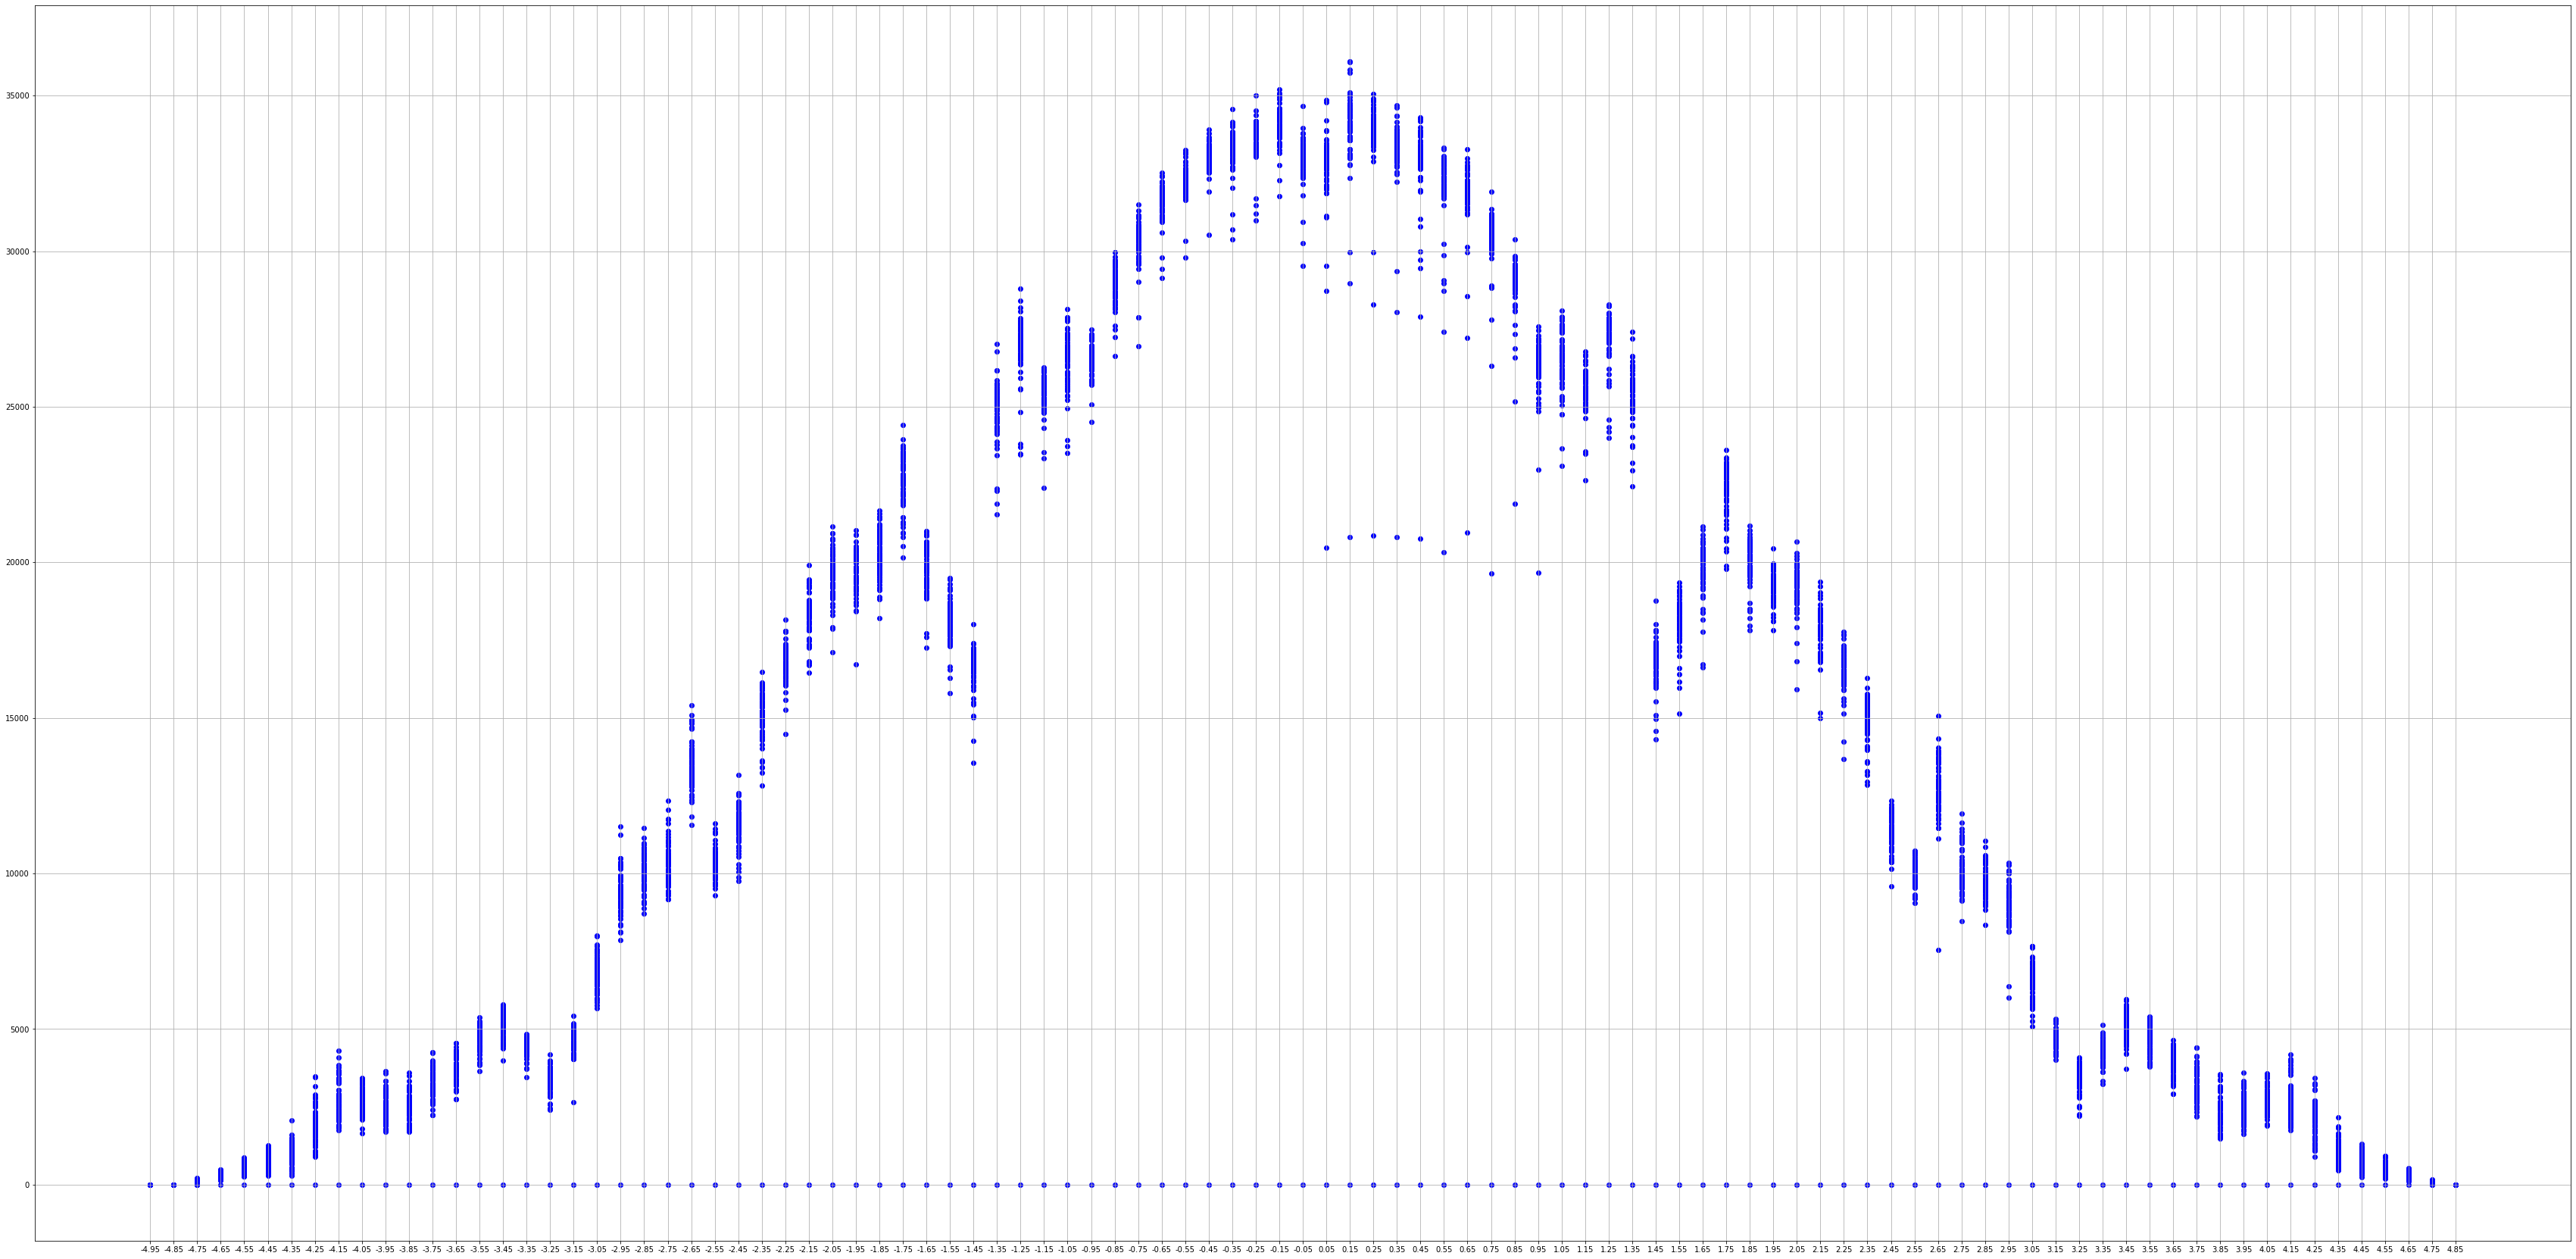

In [142]:
plt.figure(figsize=(60,30))
# plt.bar(tmp['x'],tmp['occ'])
plt.scatter(tmp['x'],tmp['occ'],color='b')
plt.grid()
plt.xticks(tmp['x'].unique(),(np.arange(0,tmp['x'].max()+1)-((tmp['x'].max()+1)/2)) /10)

Text(0.5, 0, 'occupancy')

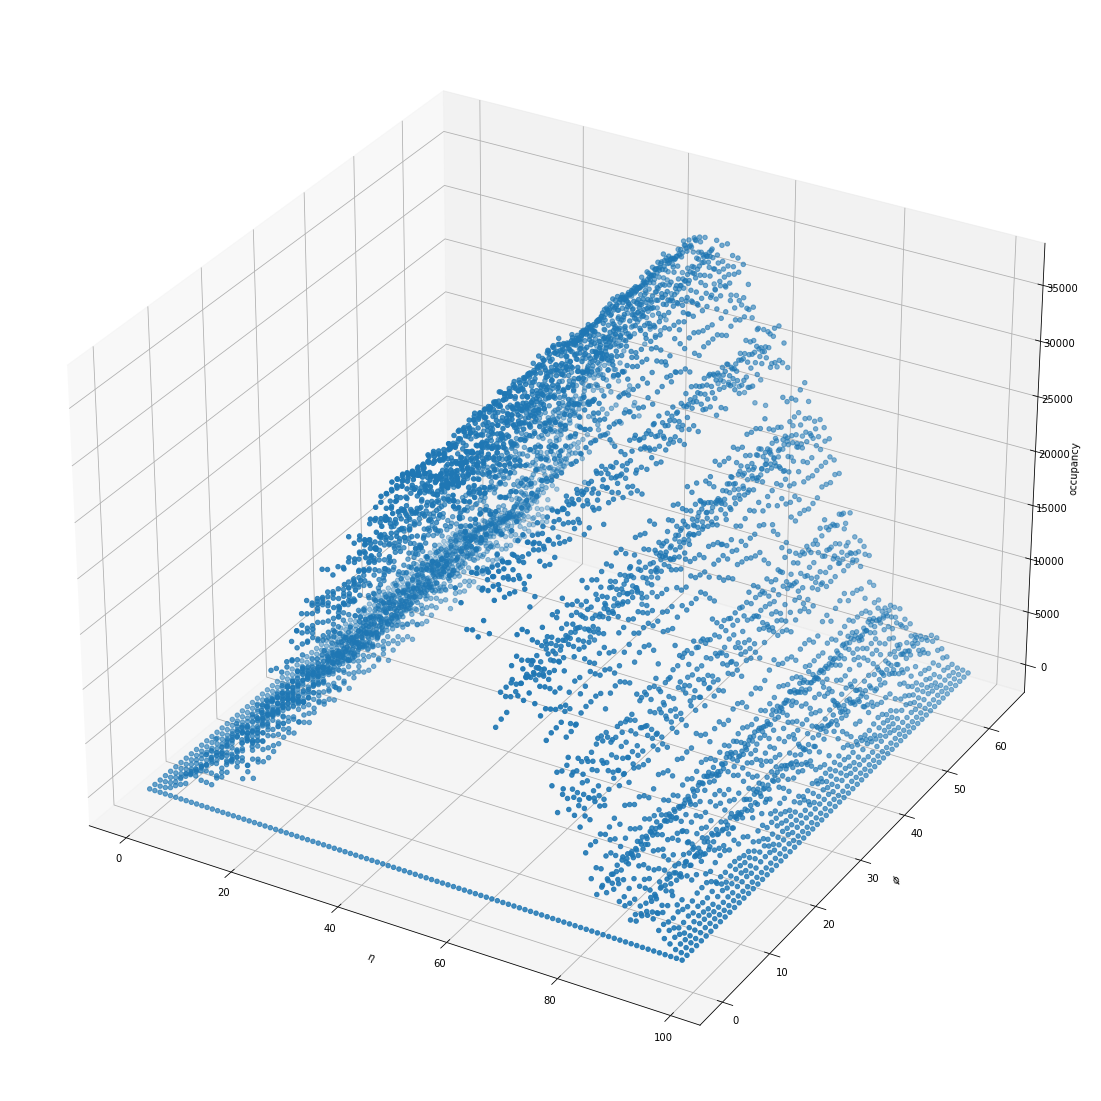

In [119]:
plt.figure(figsize=(20,20))
ax = plt.axes(projection ="3d")
ax.scatter3D(tmp['x'],tmp['y'],tmp['occ'])
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel('occupancy')